# TEAM A

# Web Scraping Car Data from Cars24.com

## Table of Contents
1. [Introduction](#Introduction)
2. [ChromeDriver](#ChromeDriver)
3. [Page Functions](#Page_Functions)
4. [Data Cleaning](#Data_Cleaning)
5. [Car Brands](#CAR_BRANDS)\
   -[Maruti Cars](#Maruti_Cars)\
   -[Tata Cars](#Tata_Cars)\
   -[Honda Cars](#Honda_Cars)\
   -[Hyundai Cars](#Hyundai_Cars)
7. [Data Visualization](#Data_Visualization)
8. [Saving the DataFrame to CSV File](#Save_DataFrame_to_CSV_File)



## Introduction
This Jupyter Notebook demonstrates the process of web scraping car data from the website Cars24.com. The objective is to extract specific details about cars listed on the site, including the year, brand, car model, kilometers driven, fuel type, transmission, location, and price. This data will be used for a machine learning project aimed at analyzing trends and patterns in the used car market.

The notebook is divided into several sections, each covering different aspects of the scraping and data processing workflow. The code is documented thoroughly to ensure clarity and ease of understanding.

### Objectives
- To scrape car listing data from Cars24.com.
- To clean and structure the extracted data.
- To save the processed data to a CSV file for further of service.


---


 ## Importing_Libraries

 ### Importing necessary libraries for web scraping and data handling

We import essential libraries for web scraping: Selenium to control the browser and handle dynamic content, BeautifulSoup to parse HTML, and Pandas to manage data. Warnings are suppressed to keep output clean.

In [6]:
# Selenium: A tool for automating web browser interaction
from selenium import webdriver # For controlling the web browser
from selenium.webdriver.chrome.options import Options # For configuring browser options
from selenium.webdriver.chrome.service import Service # For managing the ChromeDriver service
from selenium.webdriver.common.by import By # For locating elements on the page
from selenium.webdriver.support.ui import WebDriverWait # For implementing explicit waits
from selenium.webdriver.support import expected_conditions as EC # For defining wait conditions

# BeautifulSoup: A library for parsing HTML and XML documents
from bs4 import BeautifulSoup 
import time # Time: A library for handling time-related tasks
import pandas as pd # For creating and manipulating data frames
import warnings # For managing warning messages
warnings.filterwarnings("ignore", module="some_library") # Suppress warnings to avoid clutter in the notebook output
import numpy as np
import pandas as pd
# Data Visualisation
import matplotlib.pyplot as plt 

## ChromeDriver 

### You can download chromedriver according to your chrome version by click the download button below:
[Download Chrome Driver](https://developer.chrome.com/docs/chromedriver/downloads)

We set up the path for ChromeDriver and configure Chrome options to run the browser in headless mode. The ChromeDriver service is then initialized, and we launch the Chrome browser to open the specified URL.

In [2]:
# Configure Chrome options
chrome_options = Options()
chrome_options.add_argument("--headless") # Run Chrome in headless mode (without GUI)

# Initialize Chrome driver
driver = webdriver.Chrome(options=chrome_options)

# Define website URL
website = 'https://www.cars24.com/buy-used-car?sort=bestmatch&serveWarrantyCount=true&gaId=1124995550.1722791903&listingSource=FilterTags&storeCityId=2378'

# Open the website
driver.get(website)

## Page_Functions

## Scroll Page Function
### Defining a function to scroll to the bottom of the webpage and wait for the page to load

A function is defined to scroll to the bottom of the page and pause for 3 seconds to allow new content to load. This function is then executed multiple times in a loop to load additional content.

In [7]:
def scroll_page():
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);") # Scroll to the bottom of the page
    time.sleep(3) # Wait for 3 seconds to allow the page to load

# Scroll Through the Page
# Using the scroll_page function to scroll down the webpage multiple times to load more content
for _ in range(7):
    scroll_page()

## Wait for Page Elements to Load
### Waiting for specific page elements to load before scraping the content

A WebDriverWait instance is created to wait up to 10 seconds for a specific element to be present on the page. Once the element is found, the webpage content is parsed using BeautifulSoup. Finally, the browser is closed and the WebDriver is terminated.

In [ ]:
# Define a WebDriverWait instance with a 10-second timeout
wait = WebDriverWait(driver, 10)

# Wait until an element with the specified class name is present on the page
wait.until(EC.presence_of_element_located((By.CLASS_NAME, "_2YB7p")))

## Parsing the loaded webpage content using BeautifulSoup
soup = BeautifulSoup(driver.page_source, 'html.parser')

# Closing the browser and quitting the WebDriver
driver.quit()

## Extract_Car_Data_rom_Page_Source
### Extracting car data from the parsed page source using BeautifulSoup

Car listing elements are located and parsed for relevant details such as name, year, mileage, fuel type, transmission, price, and location. This data is then compiled into a DataFrame and saved as a CSV file.

In [ ]:
# Find all car listing elements
results = soup.find_all('div', {'class': '_2YB7p'})
# Initialize an empty list to store car data
data = []

# Loop through each car listing and extract relevant information
for car in results:
    # Extract the full name and year of the car
    name_elem = car.find('h3', {'class': '_11dVb'})
    full_name = name_elem.get_text() if name_elem else ''
    year = int(full_name[:4]) if full_name else ''
    name = full_name[5:] 
    brand = name[:name.index(" ")] if full_name else ''
    name = name[name.index(" "):] if full_name else ''

    # Extract details such as mileage, fuel type, and transmission
    details = car.find('ul', {'class': '_3J2G-'})
    mileage = details.find_all('li')[0].get_text() if details else ''
    fuel_type = details.find_all('li')[2].get_text() if details else ''
    transmission = details.find_all('li')[4].get_text() if details else ''

    # Extract the price of the car
    price_elem = car.find('strong', {'class': '_3RL-I'})
    price = price_elem.get_text() if price_elem else ''

    # Extract the location of the car
    location_elem = car.find('p', {'class': '_3dGMY'})
    location = location_elem.find_all('span')[-1].get_text() if location_elem else 'Mumbai'
    if location[-1:] == '\n' :
         location = location[:-2]
    elif location == 'Today':
         location = 'Mumbai'

    # Append the extracted data to the list
    data.append({
        'YearofManufacture': year,
        'Brand': brand,
        'CarName': name,
        'KilometersDriven': mileage,
        'FuelType': fuel_type,
        'Transmission': transmission,
        'Price': price,
        'Location': location
    })

# Create a DataFrame from the list of car data
df = pd.DataFrame(data)    
df.to_csv('TeamA_cars24.csv', index=False)

In [ ]:
print(f"Number of cars: {len(results)}") # Print the total number of cars extracted

Number of cars: 605


## Data_Cleaning

## Sorting, Checking for Missing Values, Resetting Index for all thecars

The DataFrame is sorted by 'Brand' and 'YearofManufacture' columns, checked for missing values, and then reset with a new index starting from 1. The final DataFrame is displayed.

In [ ]:
df.sort_values(by=['Brand', 'YearofManufacture'], inplace=True) # Sorting the DataFrame by 'Brand' and 'YearofManufacture' columns
df.isnull().values.any() # Checking if there are any missing values in the DataFrame
df.reset_index(drop=True, inplace=True) # Resetting the index of the DataFrame and dropping the old index
df.index = df.index + 1 # Adjusting the index to start from 1 instead of 0
df # Displaying the DataFrame

,YearofManufacture,Brand,CarName,KilometersDriven,FuelType,Transmission,Price,Location
1,2017,Datsun,Go Plus T,"17,062 km",Petrol,Manual,₹3.02 Lakh,"Mulund West, Mumbai"
2,2018,Datsun,Redi Go A,"50,310 km",Petrol,Manual,₹2.27 Lakh,"Goregaon, Mumbai"
3,2018,Datsun,Redi Go S 1.0 AMT,"86,337 km",Petrol,Automatic,₹2.62 Lakh,"Goregaon, Mumbai"
4,2018,Datsun,Redi Go T(O) 1.0 AMT,"37,339 km",Petrol,Automatic,₹2.35 Lakh,"Mulund West, Mumbai"
5,2015,Ford,Ecosport TITANIUM 1.5L PETROL,"45,779 km",Petrol,Manual,₹4.27 Lakh,Mumbai
...,...,...,...,...,...,...,...,...
601,2019,Volkswagen,Ameo HIGHLINE PLUS 1.5L AT 16 ALLOY,"60,683 km",Diesel,Automatic,₹6.93 Lakh,"Goregaon, Mumbai"
602,2020,Volkswagen,Vento HIGHLINE PLUS 1.0L TSI AT,"89,509 km",Petrol,Automatic,₹8.60 Lakh,"Mulund West, Mumbai"
603,2020,Volkswagen,Polo HIGHLINE 1.0L,"42,608 km",Petrol,Manual,₹6.35 Lakh,Mumbai
604,2021,Volkswagen,Polo 1.0 GT TSI AT,"21,543 km",Petrol,Automatic,₹9.66 Lakh,Mumbai


## Checking for null values

In [ ]:
df.isnull().sum() 

YearofManufacture    0
Brand                0
CarName              0
KilometersDriven     0
FuelType             0
Transmission         0
Price                0
Location             0
dtype: int64

In [ ]:
df = pd.DataFrame(data)

##  Extracting Unique Car Brands

In [ ]:
arr = df["Brand"].unique()
print(arr)

['Maruti' 'Hyundai' 'Volkswagen' 'Honda' 'Tata' 'Ford' 'KIA' 'Mahindra'
 'Renault' 'Toyota' 'Skoda' 'Datsun' 'Nissan' 'Jeep' 'MG']


---

# CAR_BRANDS

#  Maruti_Cars 
### Filtering, Sorting, and Resetting Index 

In [ ]:
# Filter for Maruti cars
df_maruti = df[df['Brand'].str.upper() == 'MARUTI']

# Sort and reset index for Maruti cars
df_maruti.sort_values(by=['Brand', 'YearofManufacture'], inplace=True)
df_maruti.reset_index(drop=True, inplace=True)
df_maruti.index = df_maruti.index + 1

# Display the DataFrame
df_maruti

,YearofManufacture,Brand,CarName,KilometersDriven,FuelType,Transmission,Price,Location
1,2011,Maruti,Swift ZXI,"67,971 km",Petrol,Manual,₹2.37 Lakh,Mumbai
2,2012,Maruti,Wagon R 1.0 VXI,"42,531 km",Petrol,Manual,₹2.25 Lakh,"Goregaon, Mumbai"
3,2012,Maruti,Wagon R 1.0 VXI,"43,569 km",Petrol,Manual,₹2.33 Lakh,Seawoo
4,2012,Maruti,Swift Dzire ZXI,"60,719 km",Petrol,Manual,₹3.34 Lakh,Seawoo
5,2012,Maruti,Wagon R 1.0 VXI,"32,422 km",Petrol,Manual,₹2.51 Lakh,"Mulund West, Mumbai"
...,...,...,...,...,...,...,...,...
186,2023,Maruti,XL6 ALPHA PLUS MT,"21,398 km",Petrol,Manual,₹12.46 Lakh,"Mulund West, Mumbai"
187,2023,Maruti,New Wagon-R LXI 1.0,"1,958 km",Petrol,Manual,₹5.89 Lakh,"Goregaon, Mumbai"
188,2023,Maruti,IGNIS SIGMA 1.2,"4,684 km",Petrol,Manual,₹5.33 Lakh,"Goregaon, Mumbai"
189,2023,Maruti,BREZZA ZXI SMART HYBRID,"10,234 km",Petrol,Manual,₹12.31 Lakh,"Goregaon, Mumbai"


## Save Maruti Cars Data to CSV File

In [ ]:
df.to_csv(r'TeamA_Maruti.csv', index=False) # While running the code you can replace teh file path and file name with yours

---

#  Tata_Cars 
### Filtering, Sorting, and Resetting Index 

In [ ]:
# Filter for Tata cars
df_tata = df[df['Brand'].str.upper() == 'TATA']

# Sort and reset index for Tata cars
df_tata.sort_values(by=['Brand', 'YearofManufacture'], inplace=True)
df_tata.reset_index(drop=True, inplace=True)
df_tata.index = df_tata.index + 1

# Display the DataFrame
df_tata


,YearofManufacture,Brand,CarName,KilometersDriven,FuelType,Transmission,Price,Location
1,2017,Tata,Tiago XZ PETROL,"37,602 km",Petrol,Manual,₹3.90 Lakh,"Mulund West, Mumbai"
2,2018,Tata,NEXON XZA PLUS DIESEL DUAL TONE,"1,04,792 km",Diesel,Automatic,₹6.68 Lakh,"Mulund West, Mumbai"
3,2018,Tata,TIGOR XZ PETROL,"94,586 km",Petrol,Manual,₹4.08 Lakh,"Goregaon, Mumbai"
4,2018,Tata,Tiago XZ PETROL,"76,127 km",Petrol,Manual,₹4.11 Lakh,"Mulund West, Mumbai"
5,2018,Tata,NEXON XZA PLUS PETROL,"39,992 km",Petrol,Automatic,₹7.39 Lakh,Mumbai
6,2018,Tata,NEXON XZ PLUS PETROL,"48,213 km",CNG,Manual,₹6.54 Lakh,Mumbai
7,2018,Tata,Tiago XZ PETROL,"90,317 km",Petrol,Manual,₹3.90 Lakh,Mumbai
8,2019,Tata,Harrier XZ 2.0L,"57,037 km",Diesel,Manual,₹12.84 Lakh,"Goregaon, Mumbai"
9,2019,Tata,NEXON XZA PLUS PETROL,"61,806 km",Petrol,Automatic,₹7.73 Lakh,"Mulund West, Mumbai"
10,2019,Tata,NEXON XZA PLUS DIESEL,"51,506 km",Diesel,Automatic,₹8.36 Lakh,"Goregaon, Mumbai"


## Save Tata Cars Data to CSV File

In [ ]:
df.to_csv(r'TeamA_Tata.csv', index=False) # While running the code you can replace teh file path and file name with yours

---

#  Honda_Cars 
### Filtering, Sorting, and Resetting Index 

In [ ]:
# Filter for Honda cars
df_honda = df[df['Brand'].str.upper() == 'HONDA']

# Sort and reset index for Honda cars
df_honda.sort_values(by=['Brand', 'YearofManufacture'], inplace=True)
df_honda.reset_index(drop=True, inplace=True)
df_honda.index = df_honda.index + 1

# Display the DataFrame
df_honda

,YearofManufacture,Brand,CarName,KilometersDriven,FuelType,Transmission,Price,Location
1,2011,Honda,City 1.5L I-VTEC V MT,"90,143 km",Petrol,Manual,₹2.54 Lakh,"Mulund West, Mumbai"
2,2011,Honda,City 1.5L I-VTEC V AT,"65,495 km",Petrol,Automatic,₹2.71 Lakh,Mumbai
3,2012,Honda,City 1.5L I-VTEC V MT,"86,006 km",CNG,Manual,₹3.32 Lakh,Mumbai
4,2013,Honda,Amaze 1.2L I-VTEC S,"43,540 km",Petrol,Manual,₹3.20 Lakh,"Mulund West, Mumbai"
5,2014,Honda,Amaze 1.2L I-VTEC S,"52,803 km",Petrol,Manual,₹3.54 Lakh,"Mulund West, Mumbai"
...,...,...,...,...,...,...,...,...
64,2020,Honda,WR-V 1.2L I-VTEC VX MT,"42,897 km",Petrol,Manual,₹7.40 Lakh,"Mulund West, Mumbai"
65,2020,Honda,Amaze 1.2L I-VTEC V,"30,688 km",Petrol,Manual,₹6.03 Lakh,Mumbai
66,2021,Honda,Jazz 1.2L I-VTEC ZX CVT,"10,102 km",Petrol,Automatic,₹8.59 Lakh,"Goregaon, Mumbai"
67,2021,Honda,City 1.5L I-VTEC ZX CVT,"22,827 km",Petrol,Automatic,₹12.84 Lakh,"Mulund West, Mumbai"


## Save Honda Cars Data to CSV File

In [ ]:
df.to_csv(r'TeamA_Honda.csv', index=False)  # While running the code you can replace teh file path and file name with yours

---

#  Hyundai_Cars 
### Filtering, Sorting, and Resetting Index 

In [ ]:
# Filter for Hyundai cars
df_hyundai = df[df['Brand'].str.upper() == 'HYUNDAI']

# Sort and reset index for Hyundai cars
df_hyundai.sort_values(by=['Brand', 'YearofManufacture'], inplace=True)
df_hyundai.reset_index(drop=True, inplace=True)
df_hyundai.index = df_hyundai.index + 1

# Display the DataFrame
df_hyundai


,YearofManufacture,Brand,CarName,KilometersDriven,FuelType,Transmission,Price,Location
1,2011,Hyundai,i20 ASTA 1.2,"31,724 km",Petrol,Manual,₹2.21 Lakh,"Goregaon, Mumbai"
2,2011,Hyundai,i10 MAGNA 1.1,"79,326 km",Petrol,Manual,₹1.94 Lakh,"Goregaon, Mumbai"
3,2011,Hyundai,i20 SPORTZ 1.2,"1,22,248 km",Petrol,Manual,₹2.25 Lakh,"Mulund West, Mumbai"
4,2011,Hyundai,i10 SPORTZ 1.2,"30,522 km",Petrol,Manual,₹2.00 Lakh,"Goregaon, Mumbai"
5,2011,Hyundai,i10 SPORTZ 1.2 AT,"51,696 km",Petrol,Automatic,₹2.46 Lakh,"Goregaon, Mumbai"
...,...,...,...,...,...,...,...,...
173,2022,Hyundai,GRAND I10 NIOS SPORTZ 1.2 KAPPA VTVT CNG,"21,570 km",CNG,Manual,₹7.45 Lakh,"Mulund West, Mumbai"
174,2022,Hyundai,GRAND I10 NIOS SPORTZ 1.2 KAPPA VTVT CNG,"15,638 km",CNG,Manual,₹6.94 Lakh,"Goregaon, Mumbai"
175,2022,Hyundai,AURA SX PLUS 1.2 AMT,"20,883 km",Petrol,Automatic,₹7.85 Lakh,"Goregaon, Mumbai"
176,2023,Hyundai,AURA SX 1.2 CNG,"13,184 km",CNG,Manual,₹8.34 Lakh,"Goregaon, Mumbai"


## Save Hyundai Cars Data to CSV File

In [ ]:
df.to_csv(r'TeamA_Hyundai.csv', index=False) # While running the code you can replace teh file path and file name with yours

---

# Data_Visualization

## Finding Lowest Prices for Each Car Model by Brand

In [ ]:
lowest_prices = df.groupby(['Brand','CarName'])['Price'].min().reset_index(0)
print(lowest_prices)

                                                      Brand        Price
CarName                                                                 
Go Plus T                                            Datsun   ₹3.02 Lakh
Redi Go A                                            Datsun   ₹2.27 Lakh
Redi Go S 1.0 AMT                                    Datsun   ₹2.62 Lakh
Redi Go T(O) 1.0 AMT                                 Datsun   ₹2.35 Lakh
Ecosport TITANIUM 1.0L ECOBOOST SPORTS(SUNROOF)        Ford   ₹7.58 Lakh
...                                                     ...          ...
VIRTUS GT PLUS TSI 1.5 EVO DSG                   Volkswagen  ₹17.14 Lakh
Vento HIGHLINE 1.6 MPI                           Volkswagen   ₹4.03 Lakh
Vento HIGHLINE PLUS 1.0L TSI AT                  Volkswagen   ₹8.60 Lakh
Vento HIGHLINE PLUS 1.5 AT 16 ALLOY              Volkswagen   ₹7.57 Lakh
Vento TRENDLINE 1.6                              Volkswagen   ₹2.62 Lakh

[292 rows x 2 columns]


## Calculating Price per Kilometer and Finding Best Deals

In [ ]:
df['Price'] = (df['Price'].str.replace('₹', '').str.replace(' Lakh', '').astype(float) * 1e5).astype(int)
df['KilometersDriven'] = df['KilometersDriven'].str.replace(',', '').str.replace(' km', '').astype(int)
df['PricePerKm'] = df['Price'] / df['KilometersDriven']
best_deals = df.sort_values(by='PricePerKm').reset_index(drop=True)
best_lowest_prices = best_deals.groupby(['Brand','CarName'])['Price'].min().reset_index(1)
best_lowest_prices

,CarName,Price
Brand,,
Datsun,Go Plus T,302000
Datsun,Redi Go A,227000
Datsun,Redi Go S 1.0 AMT,262000
Datsun,Redi Go T(O) 1.0 AMT,235000
Ford,Ecosport TITANIUM 1.0L ECOBOOST SPORTS(SUNROOF),758000
...,...,...
Volkswagen,VIRTUS GT PLUS TSI 1.5 EVO DSG,1714000
Volkswagen,Vento HIGHLINE 1.6 MPI,403000
Volkswagen,Vento HIGHLINE PLUS 1.0L TSI AT,860000


## Calculating Average Prices for Each Car Model by Brand

In [ ]:
average_prices = df.groupby(['Brand','CarName'])['Price'].mean().reset_index(1)
average_prices

,CarName,Price
Brand,,
Datsun,Go Plus T,302000.0
Datsun,Redi Go A,227000.0
Datsun,Redi Go S 1.0 AMT,262000.0
Datsun,Redi Go T(O) 1.0 AMT,235000.0
Ford,Ecosport TITANIUM 1.0L ECOBOOST SPORTS(SUNROOF),758000.0
...,...,...
Volkswagen,VIRTUS GT PLUS TSI 1.5 EVO DSG,1714000.0
Volkswagen,Vento HIGHLINE 1.6 MPI,403000.0
Volkswagen,Vento HIGHLINE PLUS 1.0L TSI AT,860000.0


## Additional Analysis: Fuel Type, Location Distribution, and Age of Cars

In [ ]:
total_kilometers = df.groupby('FuelType')['KilometersDriven'].sum().reset_index(0)
car_distribution = df['Location'].value_counts().reset_index(0)
car_distribution.columns = ['Location', 'NumberOfCars']
oldest_car = df[df['YearofManufacture'] == df['YearofManufacture'].min()]
newest_car = df[df['YearofManufacture'] == df['YearofManufacture'].max()]

## Visualizing the Distribution of Car Brands

(np.float64(-1.0999987936861992),
 np.float64(1.0999999425564857),
 np.float64(-1.099999958296512),
 np.float64(1.0999995971494676))

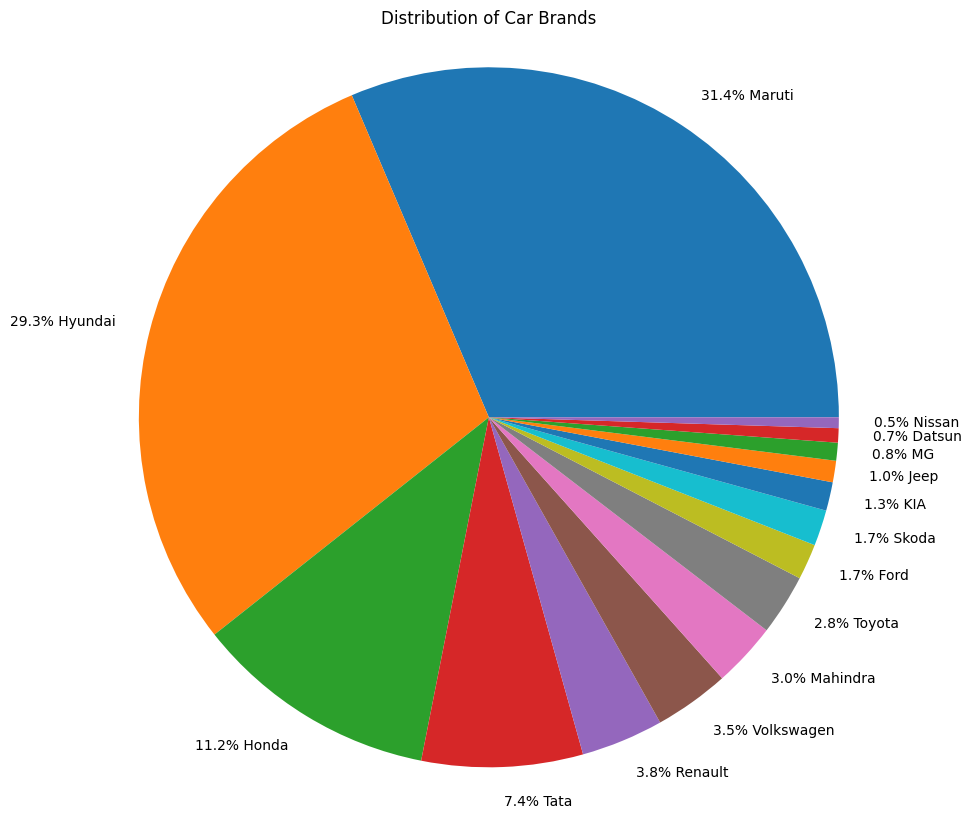

In [ ]:
brand_counts = df['Brand'].value_counts()

brand_percentages = brand_counts / brand_counts.sum() * 100


labels = [f'{percentage:.1f}% {brand}' for brand, percentage in brand_percentages.items()]

plt.figure(figsize=(12, 10))
plt.pie(brand_counts.values, labels=labels)
plt.title('Distribution of Car Brands')
plt.axis('equal')  


## Scatter Plot of Kilometers Driven vs. Price

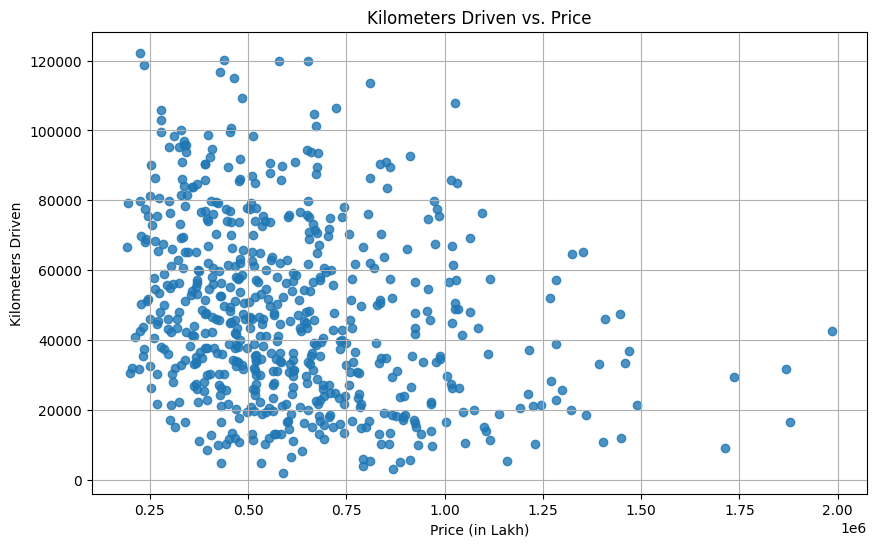

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Price'],df['KilometersDriven'], alpha=0.8)
plt.title('Kilometers Driven vs. Price')
plt.ylabel('Kilometers Driven')
plt.xlabel('Price (in Lakh)')
plt.grid(True)
plt.show()

## Bar Chart of Car Brands

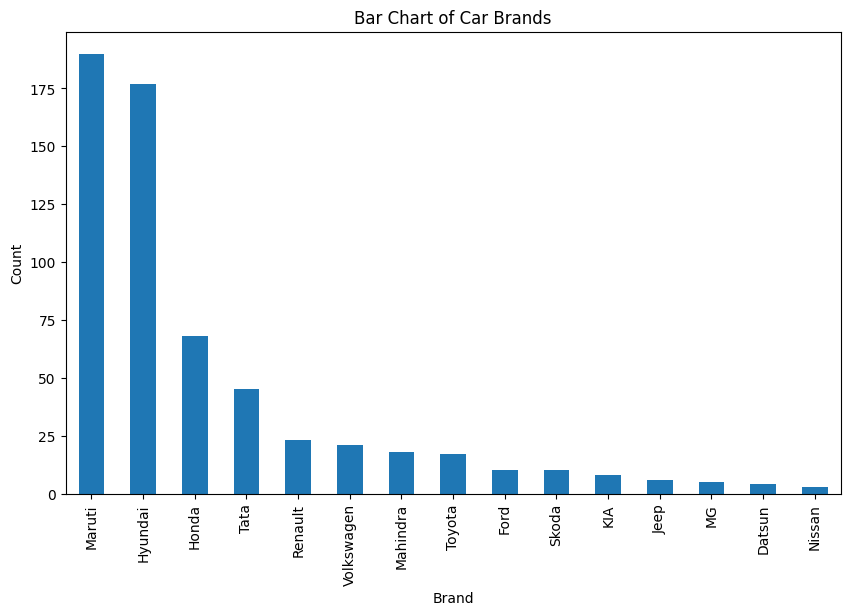

In [ ]:
# Bar Chart of Car Brands
plt.figure(figsize=(10, 6))
df['Brand'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

## Box Plot of Prices by Brand

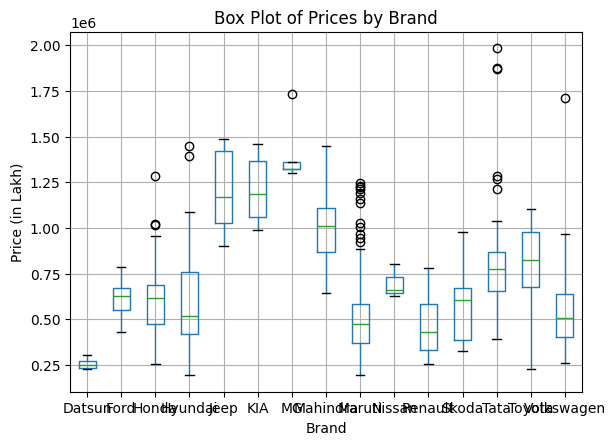

In [ ]:

df.boxplot(column='Price', by='Brand')
plt.title('Box Plot of Prices by Brand')
plt.suptitle('')  # Suppress the default title to keep the plot clean
plt.xlabel('Brand')
plt.ylabel('Price (in Lakh)')
plt.show()


## Pie Chart of Fuel Types

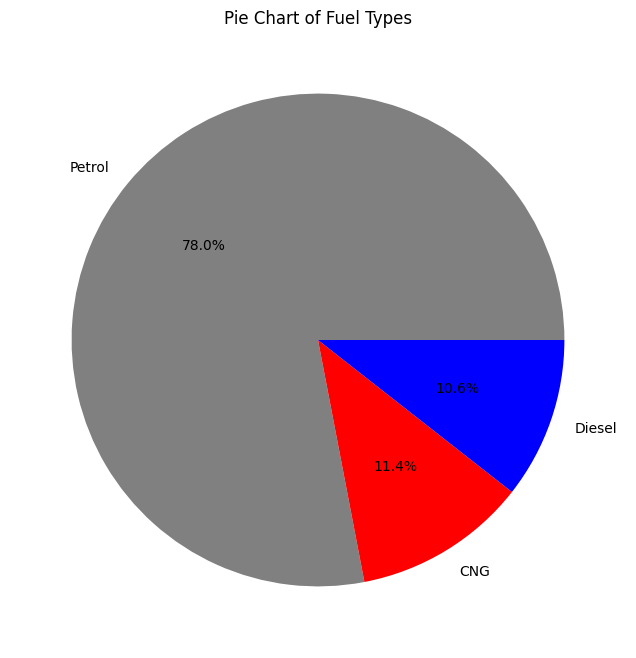

In [ ]:
# Pie Chart of Fuel Types
plt.figure(figsize=(8, 8))
df['FuelType'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["gray","red","blue"])
plt.title('Pie Chart of Fuel Types')
plt.ylabel('')
plt.show()


## Pie Chart of Transmission Types

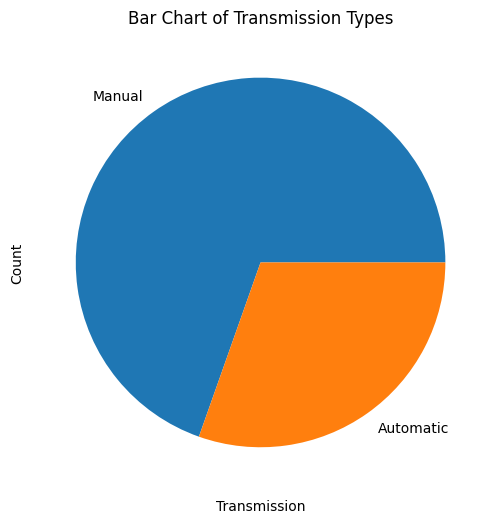

In [ ]:
# Bar Chart of Transmission Types
plt.figure(figsize=(10, 6))
df['Transmission'].value_counts().plot(kind='pie')
plt.title('Bar Chart of Transmission Types')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.show()


## Scatter Plot of Year of Manufacture vs. Price

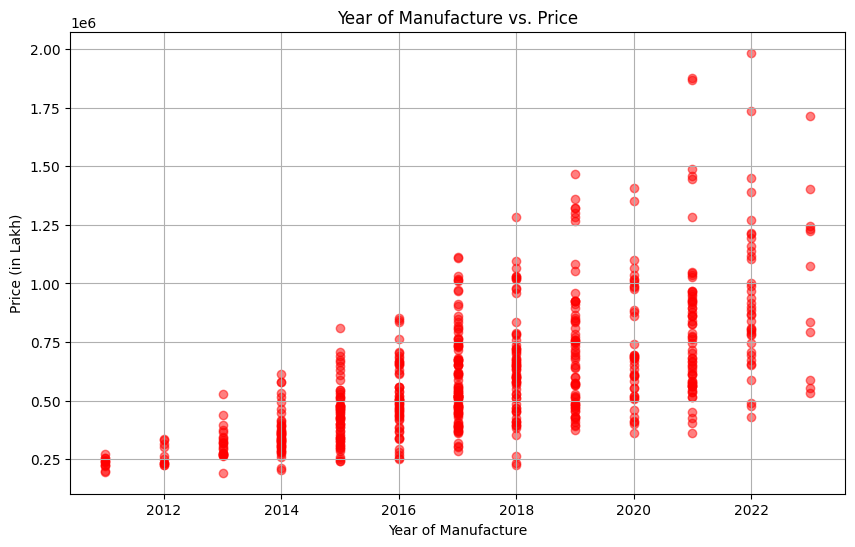

In [ ]:
# Scatter Plot of Year of Manufacture vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(df['YearofManufacture'], df['Price'], c='red', alpha=0.5)
plt.title('Year of Manufacture vs. Price')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in Lakh)')
plt.grid(True)

## Bar Chart of Locations

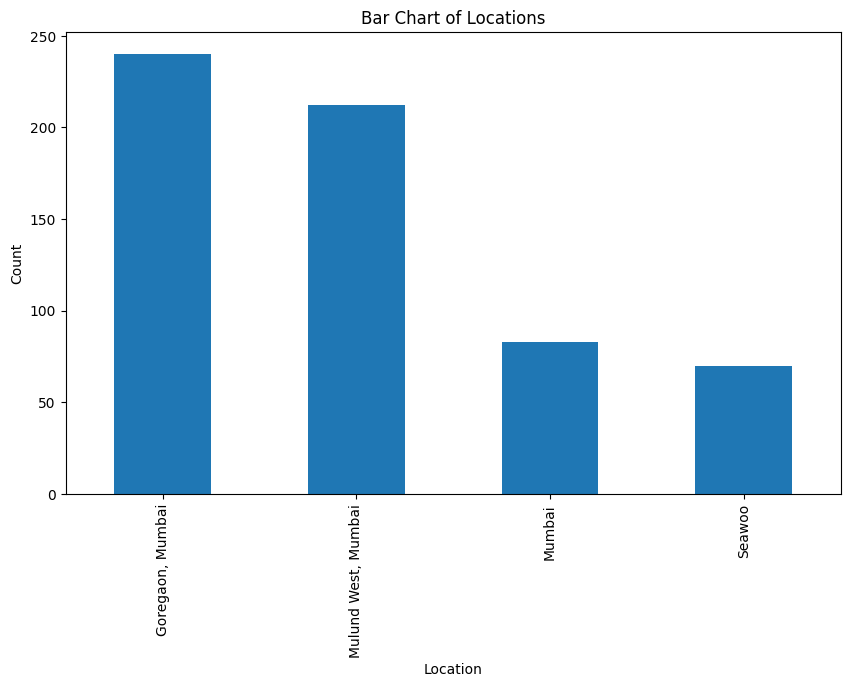

In [ ]:
# Bar Chart of Locations
plt.figure(figsize=(10, 6))
df['Location'].value_counts().plot(kind='bar')
plt.title('Bar Chart of Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

## Histogram of Year of Manufacture

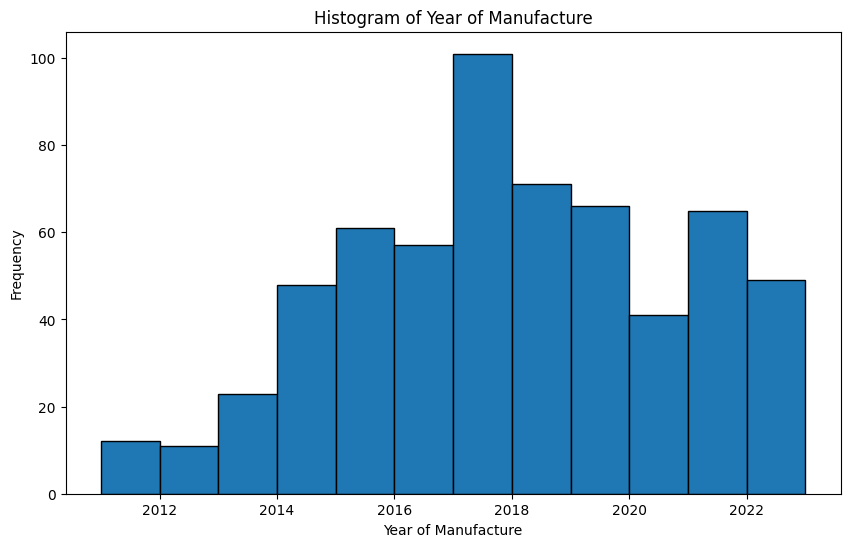

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['YearofManufacture'], bins=range(df['YearofManufacture'].min(), df['YearofManufacture'].max() + 1), edgecolor='black')
plt.title('Histogram of Year of Manufacture')
plt.xlabel('Year of Manufacture')
plt.ylabel('Frequency')
plt.show()

## Save_DataFrame_to_CSV_File

In [ ]:
df.to_csv(r'TeamA_cars24.csv', index=False)